In [1]:
from os.path import join

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import toml
import jax.numpy as jnp

plt.style.use(
    "https://raw.githubusercontent.com/JaxGaussianProcesses/GPJax/main/docs/examples/gpjax.mplstyle"
)

mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["savefig.format"] = "pdf"
mpl.rcParams["savefig.bbox"] = "tight"
mpl.rcParams["figure.autolayout"] = True
colors = mpl.rcParams["axes.prop_cycle"].by_key()["color"]

params = toml.load("params.toml")["2D"]
a = params["a"]
noise = params["noise"]
N_train = params["N_train"]
N_test_1D = params["N_test_1D"]
N_c_list = params["N_c_list"]


In [2]:
def plot_results(directory, perf_metric , dimensions):
    if perf_metric == 'RMSE':
        errCust_all = np.load(join(directory,'RMSE (Custom Kernel).npy'))
        errDiagObs_all = np.load(join(directory,'RMSE (Artificial Kernel).npy'))
        errDiag_all = np.load(join(directory,'RMSE (Diagonal Kernel).npy'))
    
    if perf_metric == 'NLPD':
        errCust_all = np.load(join(directory,'NLPD (Custom Kernel).npy'))
        errDiagObs_all = np.load(join(directory,'NLPD (Artificial Kernel).npy'))
        errDiag_all = np.load(join(directory,'NLPD (Diagonal Kernel).npy'))
    
    # Plot the results
    plt.figure(figsize=(10,5))

    denom = np.sqrt(50)

    errDiag = errDiag_all.mean()
    errDiagStd = errDiag_all.std()/denom

    errCust = errCust_all.mean()
    errCustStd = errCust_all.std()/denom

    errDiagObs = errDiagObs_all.mean(axis=0)
    errDiagObsStd = errDiagObs_all.std(axis=0)/denom

    errDiag_plot = jnp.array([errDiag] * len(N_c_list))
    errCust_plot = jnp.array([errCust] * len(N_c_list))
    

    plt.plot(N_c_list, errDiag_plot, label = 'Diagonal Kernel ($\mu \pm 1\sigma$)', color = colors[0])
    plt.fill_between(N_c_list, errDiag_plot - errDiagStd, errDiag_plot + errDiagStd, alpha = 0.2, color = colors[0])

    plt.plot(N_c_list, errCust_plot, label = 'Custom Kernel ($\mu \pm 1\sigma$)', color = colors[1])
    plt.fill_between(N_c_list, errCust_plot - errCustStd, errCust_plot + errCustStd, alpha = 0.2, color = colors[1])

    plt.plot(N_c_list, errDiagObs, label = 'Artificial Kernel ($\mu \pm 1\sigma$)', color = colors[2])
    plt.fill_between(N_c_list, errDiagObs - errDiagObsStd, errDiagObs + errDiagObsStd, alpha = 0.2, color = colors[2])

    plt.legend()
    plt.title(f'{perf_metric} of Custom Kernel vs. Diagonal Kernel vs. Artificial Kernel on for {dimensions}D data')
    plt.xscale('log')
    plt.xlabel('Number of Artificial Points')
    plt.ylabel(perf_metric)
    plt.savefig(join("figures", f"{perf_metric}_{dimensions}D.pdf"))

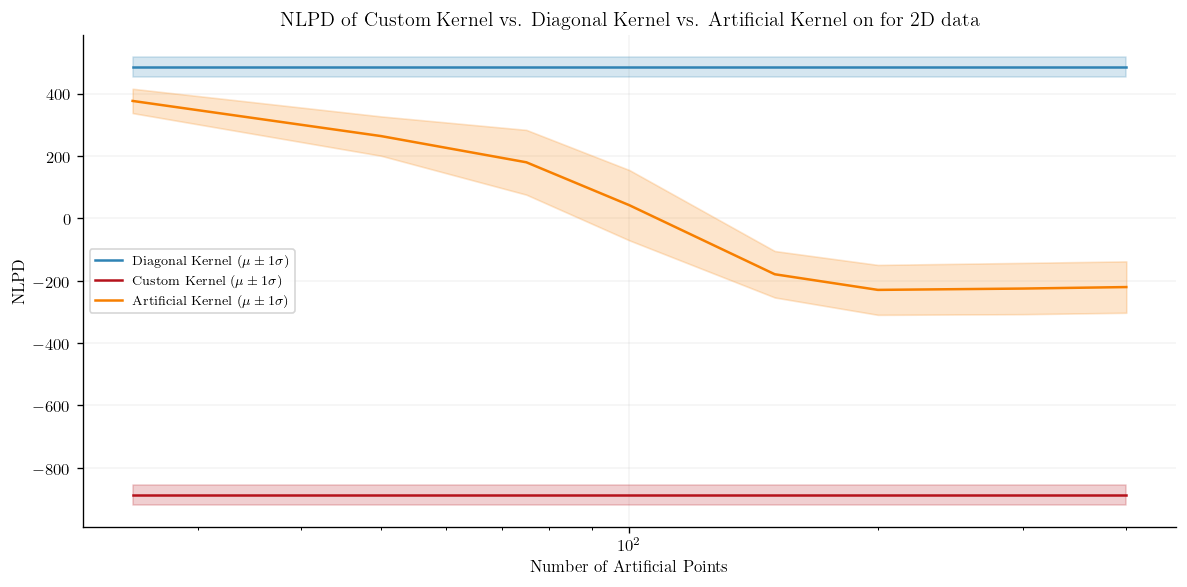

In [3]:
plot_results('results/Stolen Artificial Posterior Refactor 2', perf_metric = 'NLPD',dimensions = 2)

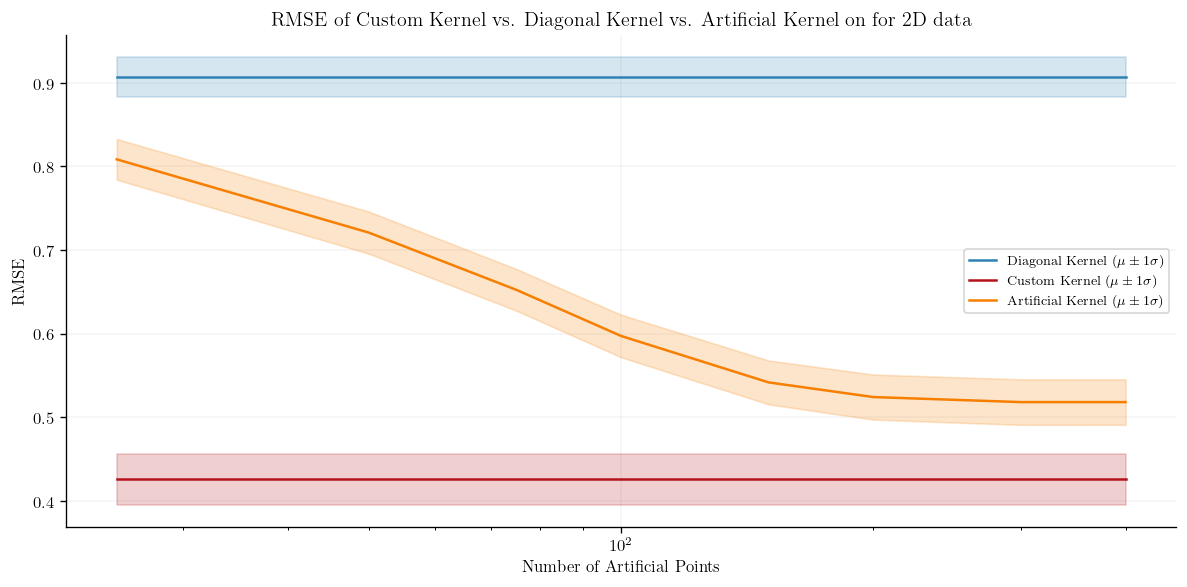

In [4]:
plot_results('results/Stolen Artificial Posterior Refactor 2', perf_metric = 'RMSE',dimensions = 2)

In [10]:

def old_plot_results(directory, perf_metric , dimensions):
    if perf_metric == 'RMSE':
        errCust_all = np.load(join(directory,'errCust_all.npy'))
        errDiagObs_all = np.load(join(directory,'errDiagObs_all.npy'))
        errDiag_all = np.load(join(directory,'errDiag_all.npy'))
    
    if perf_metric == 'NLPD':
        errCust_all = np.load(join(directory,'NLPD (Custom Kernel).npy'))
        errDiagObs_all = np.load(join(directory,'NLPD (Artificial Kernel).npy'))
        errDiag_all = np.load(join(directory,'NLPD (Diagonal Kernel).npy'))
    
    # Plot the results
    plt.figure(figsize=(10,5))

    denom = np.sqrt(50)

    errDiag = errDiag_all.mean()
    errDiagStd = errDiag_all.std()/denom

    errCust = errCust_all.mean()
    errCustStd = errCust_all.std()/denom

    errDiagObs = errDiagObs_all.mean(axis=0)
    errDiagObsStd = errDiagObs_all.std(axis=0)/denom

    errDiag_plot = jnp.array([errDiag] * len(N_c_list))
    errCust_plot = jnp.array([errCust] * len(N_c_list))
    

    plt.plot(N_c_list, errDiag_plot, label = 'Diagonal Kernel ($\mu \pm 1\sigma$)', color = colors[0])
    plt.fill_between(N_c_list, errDiag_plot - errDiagStd, errDiag_plot + errDiagStd, alpha = 0.2, color = colors[0])

    plt.plot(N_c_list, errCust_plot, label = 'Custom Kernel ($\mu \pm 1\sigma$)', color = colors[1])
    plt.fill_between(N_c_list, errCust_plot - errCustStd, errCust_plot + errCustStd, alpha = 0.2, color = colors[1])

    plt.plot(N_c_list, errDiagObs, label = 'Artificial Kernel ($\mu \pm 1\sigma$)', color = colors[2])
    plt.fill_between(N_c_list, errDiagObs - errDiagObsStd, errDiagObs + errDiagObsStd, alpha = 0.2, color = colors[2])

    plt.legend()
    plt.title(f'{perf_metric} of Custom Kernel vs. Diagonal Kernel vs. Artificial Kernel on for {dimensions}D data')
    # plt.xscale('log')
    plt.xlabel('Number of Artificial Points')
    plt.ylabel(perf_metric)
    plt.savefig(join("figures", f"{perf_metric}_{dimensions}D.pdf"))

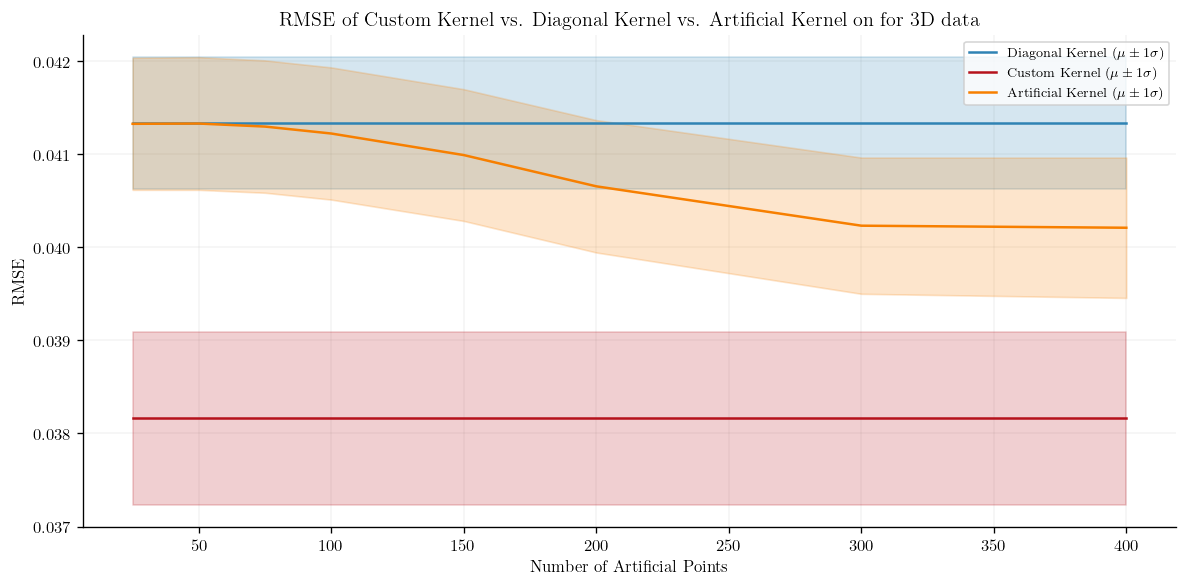

In [11]:
old_plot_results('results/BFGS_jnp', perf_metric = 'RMSE', dimensions=3)


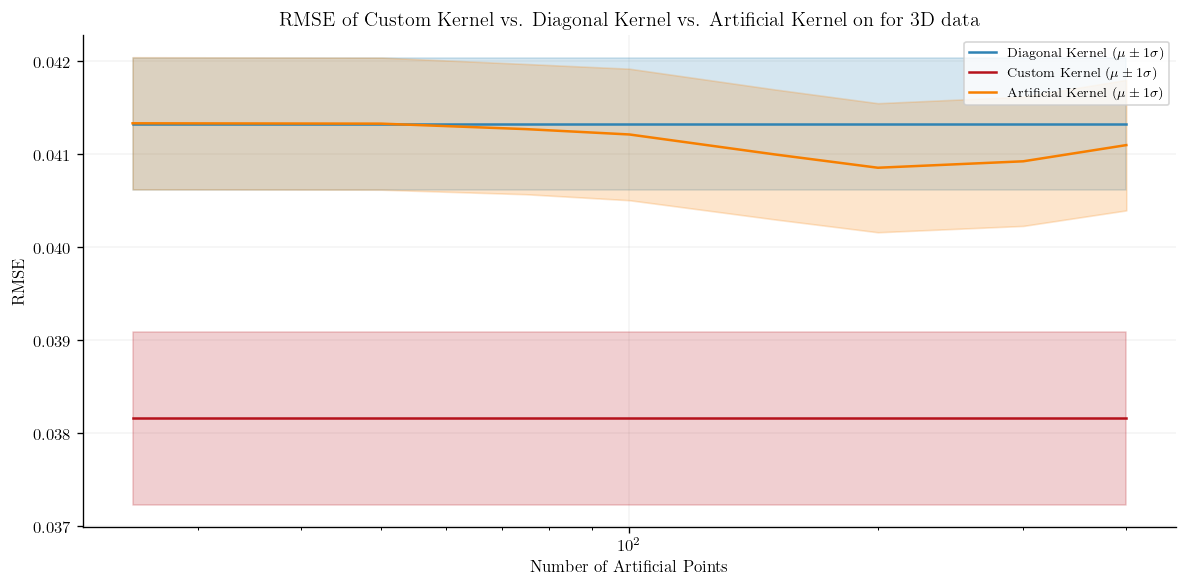

In [32]:
plot_results('results/3DRefactor', perf_metric = 'RMSE', dimensions=3)

In [33]:
plot_results('results/Stolen Artificial Posterior Refactor 2', perf_metric = 'NLPD')

TypeError: plot_results() missing 1 required positional argument: 'dimensions'

: 

In [30]:

N_c_list = [10, 19, 37, 72, 139, 268, 518, 1000]
def plot_MLL(directory):
    L_opt_cust_all = np.load(join(directory,'L_opt_cust_all.npy'))
    L_opt_diagObs_all = np.load(join(directory,'L_opt_diagObs_all.npy'))
    L_opt_diag_all = np.load(join(directory,'L_opt_diag_all.npy'))

    # Plot the results
    plt.figure(figsize=(10,5))

    denom = 50**2

    LDiag = L_opt_diag_all.mean()
    LDiagStd = L_opt_diag_all.std()/denom

    LCust = L_opt_cust_all.mean()
    LCustStd = L_opt_cust_all.std()/denom

    # LDiagObs = L_opt_diagObs_all.mean(axis=0)
    # LDiagObsStd = L_opt_diagObs_all.std(axis=0)/denom

    L_diag_plot = jnp.array([LDiag] * len(N_c_list))
    L_cust_plot = jnp.array([LCust] * len(N_c_list))
    

    plt.plot(N_c_list, L_diag_plot, label = 'Diagonal Kernel ($\mu \pm 1\sigma$)', color = colors[0])
    plt.fill_between(N_c_list, L_diag_plot - LDiagStd, L_diag_plot + LDiagStd, alpha = 0.2, color = colors[0])

    plt.plot(N_c_list, L_cust_plot, label = 'Custom Kernel ($\mu \pm 1\sigma$)', color = colors[1])
    plt.fill_between(N_c_list, L_cust_plot - LCustStd, L_cust_plot + LCustStd, alpha = 0.2, color = colors[1])

    # plt.plot(N_c_list, LDiagObs, label = 'Artificial Kernel ($\mu \pm 1\sigma$)', color = colors[2])
    # plt.fill_between(N_c_list, LDiagObs - LDiagObsStd, LDiagObs + LDiagObsStd, alpha = 0.2, color = colors[2])

    plt.title('Marginal Log-Likelihood')
    plt.xlabel('Number of Inducing Points')
    plt.ylabel('MLL')

    plt.legend()

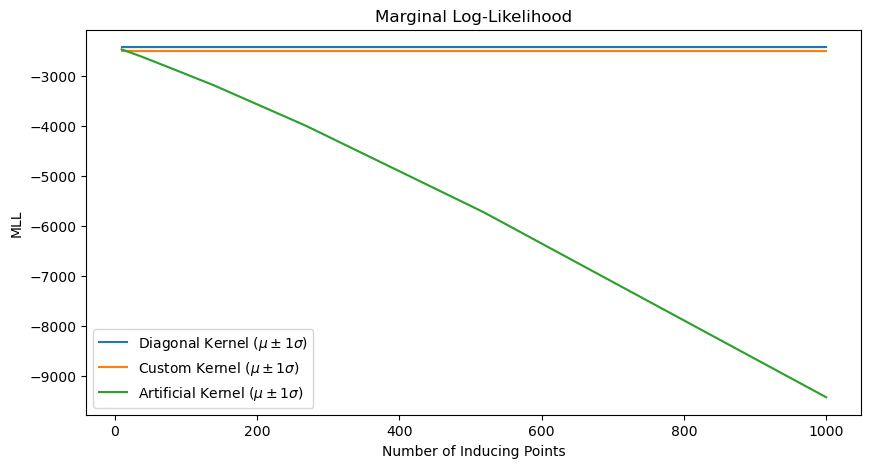

In [29]:
plot_MLL('results/NewInverse3D')

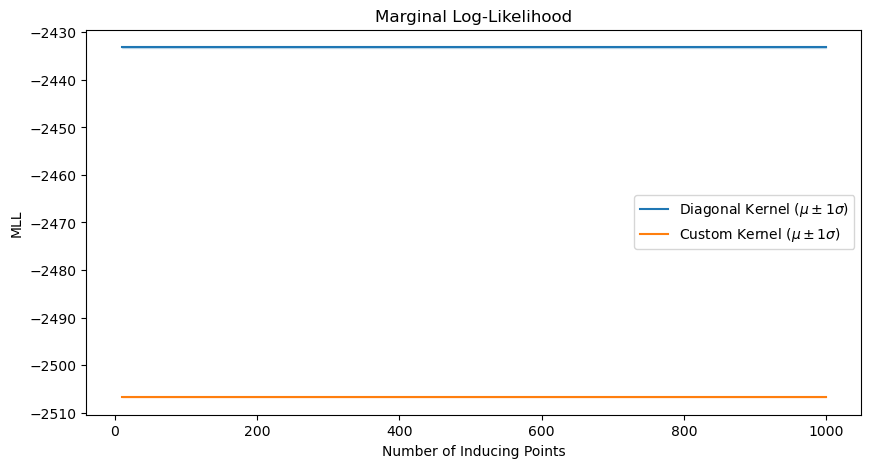

In [31]:
plot_MLL('results/NewInverse3D')